https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

# AUC - ROC Curve 

Bir ROC eğrisi (receiver operating characteristic curve), tüm sınıflandırma eşiklerinde bir sınıflandırma modelinin performansını gösteren bir grafiktir.
<br><br>
**TPR** ve **FPR** değerlerinin düzelminde bir doğru çizer.

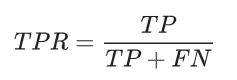

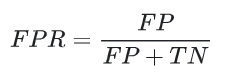

ROC curve için bir örneğe bakalım.

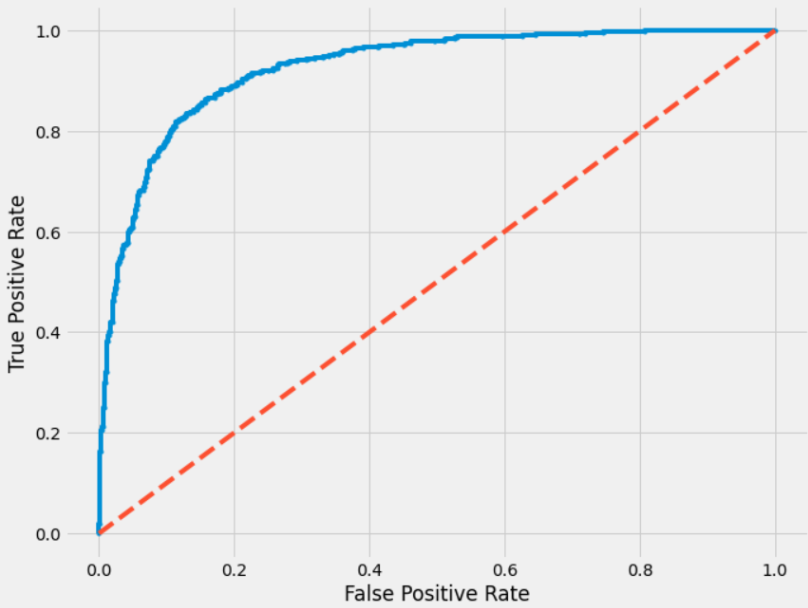

AUC ise açılımında da anlaşılacağı üzere (Area Under Curve) eğrinin altında kalan alana deniyor. Bu alan ne kadar iyise modelimizin performansı genellikle (overfit olma durumu mevcut) daha iyi oluyor.

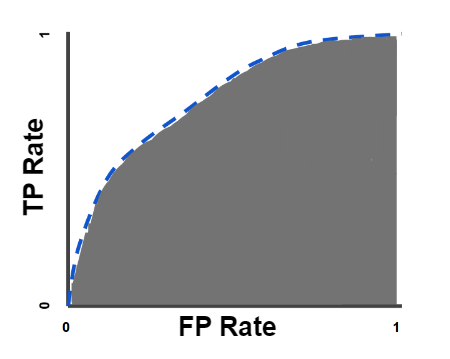

Python'da bir örnek veri seti üzerinden nasıl yapıldığına bakalım.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, consensus_score,confusion_matrix
from sklearn.model_selection import train_test_split
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./gender_classification_v7.csv')
df.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female

Örnek olarak naive bayes algoritmasını kullanarak eğitim işlemini gerçekleştirelim ve ROC Curve çizdirerek AUC'e bakalım.

In [3]:
features = df.drop('gender', axis = 1)
label = df['gender']

x_train,x_test, y_train, y_test = train_test_split(features, label, test_size= 0.33, random_state= 42)

              precision    recall  f1-score   support

      Female       0.96      0.96      0.96       809
        Male       0.96      0.96      0.96       842

    accuracy                           0.96      1651
   macro avg       0.96      0.96      0.96      1651
weighted avg       0.96      0.96      0.96      1651



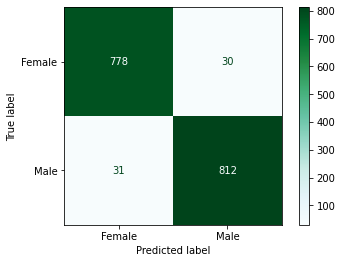

In [4]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

print(classification_report(y_pred, y_test))

plot_confusion_matrix(gnb, x_test, y_test, cmap = 'BuGn');

y_pred_proba = gnb.predict_proba(x_test)


Eğitim işlemini gerçekleştirdik ve accuracy, precision, recall ve f1-score değerlerimizin yüksek geldiğini gördük.

Şimdi ROC curve nasıl hesaplanır buna gelelim. ROC curve yukarıda da bahsettiğimiz gibi tüm sınılandırma eşiklerinde modelimizin performansını gösterir. Bizim bir sınıflama tahmini sonucunda onun hangi olasılıkta bu sınıfa ait olduğu gösteren değerler de vardır. Bu olasılıksal değere bir  eşik değeri uygulanarak 1 ve 0 diye sonuçlandırılıyor (iki sınıflı değişken için). Biz bu eşik değerini sürekli iki verinin arasına koyarak tekrardan bir 1, 0 hesaplaması gerçekleştiriyoruz ve bunun sonucunda yeni bir tahmin oluşuyor. Bu tahminlerle de yeni TPR ve FPR değerleri elde ediyoruz. Bunu her eşik değeri için yaptıktan sonra ise elimiz TPR ve FPR listeleri oluşmuş oluyor. FPR listesini x düzlemine, TPR listesini de y düzlemine koyduğumuzda oluşan eğriye **ROC Curve**, eğrinin altındaki alana ise de **AUC (Area Under Curve)** denir.

In [5]:
def compute_roc_values_two_class(y_pred,y_test, y_pred_proba):
    """
    this method is calculate TPR and FPR lists for ROC Curve and AUC
    
    :param y_test => y values for testing process
    :param y_pred_proba => probabilities of prediction values
    
    return =>TPR list and FPR list
    """
    
    TPR_list = []
    FPR_list = []
    print("Computing of Roc process started")
    for threshold in np.unique(y_pred_proba[:,0]):
        index = 0
        for value in y_pred_proba[:,1]: # Be Female probabilities
            if value < threshold:
                y_pred[index] = 'Female'
            else:
                y_pred[index] = 'Male'
            index +=1
            #Calculate TPR and FPR
        result_values = confusion_matrix(np.array(y_pred), y_test)
        TP = result_values[0,0]
        FP = result_values[1,0]
        FN = result_values[0,1]
        TN = result_values[1,1]

        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)

        TPR_list.append(tpr)
        FPR_list.append(fpr)
    print("Computing of ROC precess is finished")
    
    return TPR_list, FPR_list

In [6]:
%%time
TPR, FPR = compute_roc_values_two_class(y_pred,y_test, y_pred_proba)

Computing of Roc process started
Computing of ROC precess is finished
CPU times: total: 6.86 s
Wall time: 6.94 s


In [7]:
px.scatter(x = FPR, y = TPR, title = "ROC Curve")

ROC Curve'ü çizdirdiğimize göre şimdi de multiclass dediğimiz bağımlı değişkende 2 den daha fazla sayı bulunan veri seti için aynı işlemi gerçekleştirelim.

In [8]:
df = pd.read_csv('./Iris.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [9]:
df.drop('Id',axis = 1, inplace = True)

features = df.drop('Species', axis = 1)
label = df['Species']

x_train,x_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



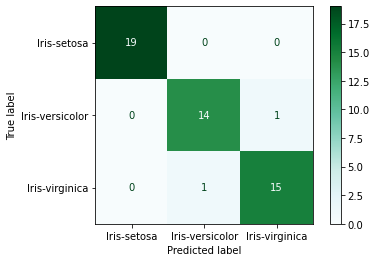

In [10]:
gnb2 = GaussianNB()
gnb2.fit(x_train, y_train)

y_pred = gnb2.predict(x_test)

y_pred_proba = gnb2.predict_proba(x_test)

print(classification_report(y_pred, y_test))

plot_confusion_matrix(gnb2, x_test, y_test, cmap = 'BuGn');

3 sınıflı yapılarda ROC Curve oluşturma mantığı **one vs rest**'e dayanır. Yani bir değeri alıp onun için hesaplamalarda bulunuruz. Bu işi 3 sınıf için de yaparız ortaya 3 ROC Curve çıkar.

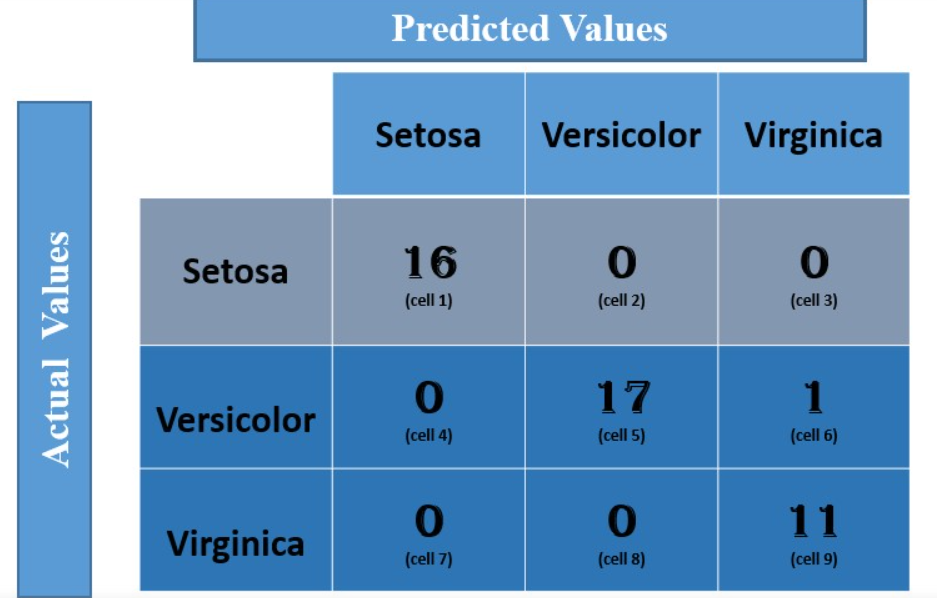

#### Setosa
FN = cell2 + cell3 <br>
FP = cell4 + cell7 <br>
TN = cell5 + cell6 + cell8 + cell9 <br>

#### Versicolor 
FN = cell4 + cell6 <br>
FP = cell2 + cell8 <br>
TN = cell1 + cell3 + cell7 + cell9 <br>

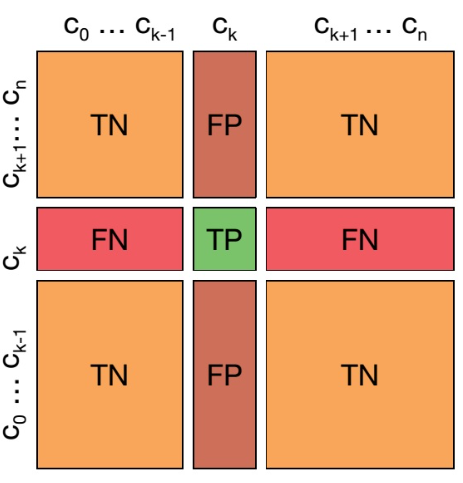

#### Virginica 
FN = cell7 + cell8 <br>
FP = cell3 + cell6 <br>
TN = cell1 + cell2 + cell4 + cell5 <br>

ROC değerlerini hesaplama fonksiyonunu yazıyoruz.

In [11]:
def compute_roc_values_three_class(x_test,y_test,x_train, y_train,class_name,model_function):
    """
    this method is calculate TPR and FPR lists for ROC Curve and AUC
    
    :param y_test => y values for testing process
    :param y_pred_proba => probabilities of prediction values
    :param class_name => one of class name in dependent variable
    
    return =>TPR list and FPR list
    """
    
    TPR_list = []
    FPR_list = []
    
    #Doing one vs rest for y_test
    y_train_df = pd.DataFrame(y_train)
    changing_index = y_train_df[y_train_df['Species'] != class_name].index
    y_train_df.loc[changing_index, 'Species'] = 'Other'
    y_train_temp = np.squeeze(np.array(y_train_df))
    
    model = model_function()
    model.fit(x_train,y_train_temp)
    
    #Doing one vs rest for y_test
    y_test_df = pd.DataFrame(y_test)
    changing_index = y_test_df[y_test_df['Species'] != class_name].index
    y_test_df.loc[changing_index, 'Species'] = 'Other'
    y_test_temp = np.squeeze(np.array(y_test_df)) 
    
    #Calculate probabality for y_test that performed one vs rest
    y_pred_proba = model.predict_proba(x_test)
    y_pred_s = model.predict(x_test)
    
    #Determine y_pred values
    for threshold in np.random.randn(100):
        y_pred = []
        for value in y_pred_proba[:,1]: #Be Class_name probabilities
            if value >= threshold:
                y_pred.append(class_name)
            else:
                y_pred.append('Other')
            
        #Calculate TPR and FPR
        TN, FP, FN, TP = confusion_matrix(np.array(y_pred), y_test_temp).ravel()
        tpr = TP / (TP + FN) 
        fpr = FP / (FP + TN)
        
        #Add list tpr and fpr
        TPR_list.append(tpr)
        FPR_list.append(fpr)
    
    return TPR_list, FPR_list

**One vs Rest** mantığıyla ROC curvelerimizi çizdiriyoruz.

In [12]:
y_train.unique()

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

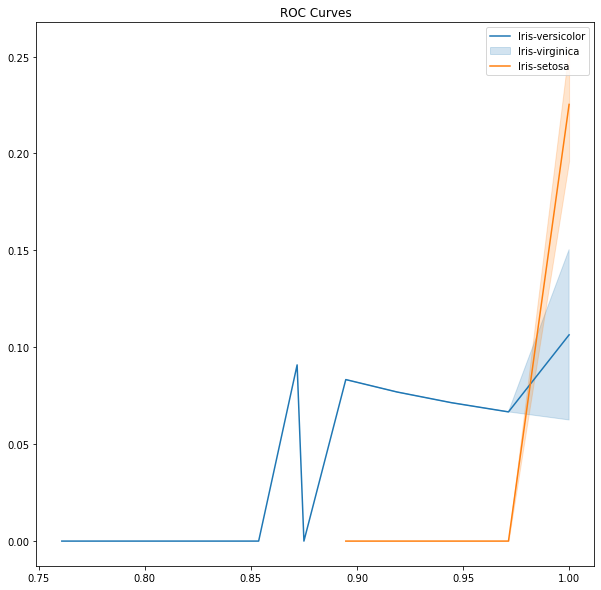

In [13]:
plt.figure(figsize = (10,10))
plt.title("ROC Curves")
for column in y_train.unique():
    tpr, fpr = compute_roc_values_three_class(x_test = x_test,y_test= y_test,x_train=x_train,y_train=y_train,
                                          class_name=column, model_function=GaussianNB)
    sns.lineplot(fpr, tpr)
plt.legend(y_train.unique(),loc = 'best')
plt.show()

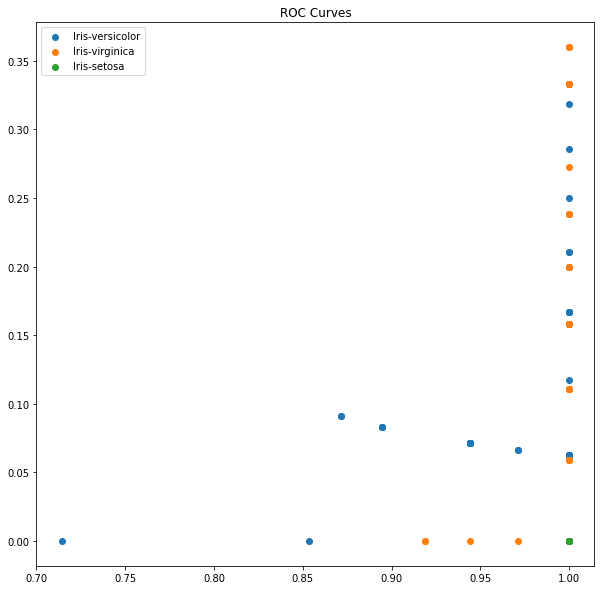

In [14]:
plt.figure(figsize = (10,10))
plt.title("ROC Curves")
for column in y_train.unique():
    tpr, fpr = compute_roc_values_three_class(x_test = x_test,y_test= y_test,x_train=x_train,y_train=y_train,
                                          class_name=column,model_function=GaussianNB)
    plt.scatter(fpr, tpr)
plt.legend(y_train.unique(),loc = 'best')
plt.show()

virginica - versicolor - setosa 
şeklinde bulunmaktadır.

In [15]:
np.argmax(gnb2.predict_proba(x_test), axis=-1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2], dtype=int64)